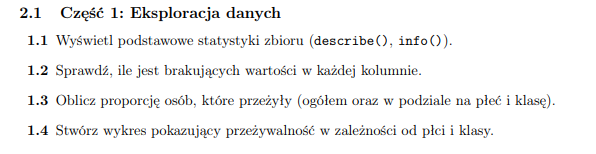

In [28]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
print(df.shape)
print(df.head())


print("Pierwsze 5 wierszy:")
print(df.head(5))
print("\nRozmiar zbioru(wiersze i kolumny):", df.shape)

print("\n----------------Wynik describe()------------------")
df.describe()



(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Pierwsze 5 wierszy:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0    

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print("--------Wynik info()---------")
df.info()


--------Wynik info()---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


1.2 Największe braki widzimy dla zmiennych age 177 pustych wierszy na 891 i deck 688 pustych wierszy na 891 wszystkich wierszy. Pozostałe zmienne braki znikome.

In [18]:
print(df['survived'].value_counts())

survived_ratios = df['survived'].value_counts(normalize=True)
print("\n--------Współczynnik przeżywalności--------")
print(survived_ratios)


survival_by_group = df.groupby(['sex', 'pclass'])['survived'].mean()
print("\n--------Współczynnik przeżywalności wg płci i klasy----------")
print(survival_by_group)

survived
0    549
1    342
Name: count, dtype: int64

--------Współczynnik przeżywalności--------
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

--------Współczynnik przeżywalności wg płci i klasy----------
sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64


**1.3**

**Pierwsza klasa (pclass=1):**<br>
Kobiety przeżywały w $\text{96.8%}$ przypadków, podczas gdy mężczyźni w $\text{36.9%}$. Różnica jest ogromna, wynosząca około $\text{60}$ punktów procentowych.

**Trzecia klasa (pclass=3):**<br>
Nawet w najniższej klasie kobiety miały $\text{50%}$ szans na przeżycie, podczas gdy mężczyźni tylko $\text{13.5%}$. W tym przypadku różnica to $\text{36.5}$ punktów procentowych.Wniosek: Proporcja przeżycia jest najwyższa dla kobiet z pierwszej klasy, a najniższa dla mężczyzn z trzeciej klasy.

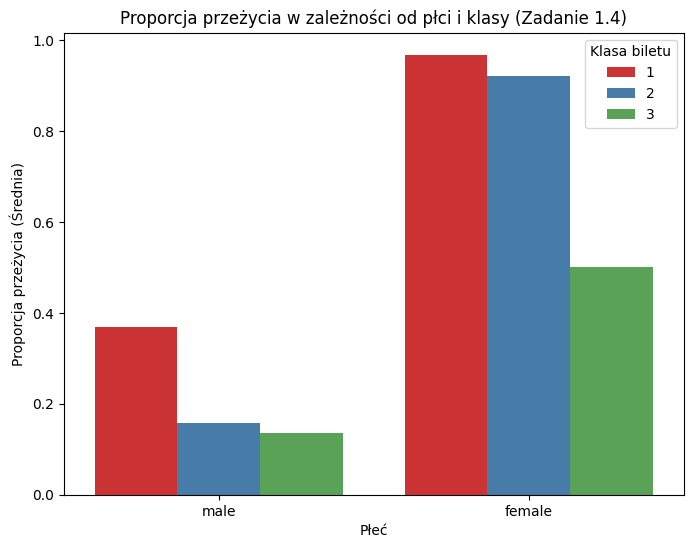

In [24]:
import matplotlib.pyplot as plt
# Używamy barplot, gdzie x to płeć, y to przeżywalność, a kolumna to klasa biletu.
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', hue='pclass', data=df, errorbar=None, palette='Set1')
plt.title('Proporcja przeżycia w zależności od płci i klasy (Zadanie 1.4)')
plt.ylabel('Proporcja przeżycia (Średnia)')
plt.xlabel('Płeć')
plt.legend(title='Klasa biletu')

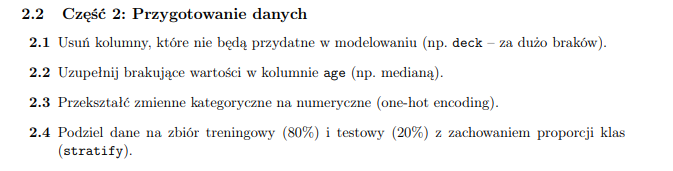

**2.1**<br>
Kolumny do usunięcia:

**deck:** Usunięta ze względu na zbyt dużą liczbę braków (ponad 75% wartości).

**class i embark_town:** Kolumna nadmiarowa Informacje te są już zawarte w kolumnach pclass (numeryczna klasa) i embarked (port zaokrętowania C, Q, S).

**alive:** Nadmiarowa — to jest po prostu tekstowa wersja zmiennej docelowej survived.

**who i adult_male:** To kolumny pochodne, które zostały stworzone z sex i age. Lepiej jest uczyć model na podstawowych cechach.

In [29]:

columns_to_drop = ['deck', 'class', 'embark_town', 'alive', 'who', 'adult_male']
df = df.drop(columns=columns_to_drop)


print("-------------Pozostałe kolumny po usunięciu:--------------")
print(df.columns)

-------------Pozostałe kolumny po usunięciu:--------------
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone'],
      dtype='object')


In [30]:
age_median = df['age'].median()
print(f"Mediana wieku to: {age_median}")

Mediana wieku to: 28.0


In [31]:

df['age'] = df['age'].fillna(age_median)

In [32]:
embarked_mode = df['embarked'].mode()[0]
print(f"Moda dla portu zaokrętowania to: {embarked_mode}")

df['embarked'] = df['embarked'].fillna(embarked_mode)

Moda dla portu zaokrętowania to: S


In [33]:
# Kolumny kategoryczne do zakodowania
categorical_cols = ['pclass', 'sex', 'embarked']

# Wykonanie One-Hot Encoding z drop_first=True
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Kształt danych po kodowaniu:", df.shape)
print("Nowe kolumny:", df.columns)

Kształt danych po kodowaniu: (891, 11)
Nowe kolumny: Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'alone', 'pclass_2',
       'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S'],
      dtype='object')


In [34]:
from sklearn.model_selection import train_test_split

# 1. Separacja cech (X) od zmiennej docelowej (y)
X = df.drop('survived', axis=1)
y = df['survived']

# 2. Podział 80/20 z zachowaniem proporcji klas (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Rozmiar zbioru treningowego (X_train): {X_train.shape}")
print(f"Rozmiar zbioru testowego (X_test): {X_test.shape}")

Rozmiar zbioru treningowego (X_train): (712, 10)
Rozmiar zbioru testowego (X_test): (179, 10)


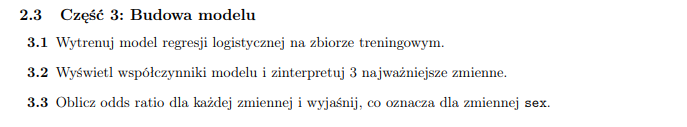

In [36]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd


# 1. Tworzenie instancji modelu
model = LogisticRegression(random_state=42, max_iter=200, solver='liblinear')

# 2. Trenowanie (dopasowanie) modelu do danych treningowych
model.fit(X_train, y_train)

print("✅ Model regresji logistycznej został wytrenowany (Zadanie 3.1).")

# --- ZADANIE 3.2 & 3.3:

# 1. Stworzenie DataFrame ze współczynnikami (Beta)
coefficients = pd.DataFrame({
    'Cecha': X_train.columns,
    'Wspolczynnik (Beta)': model.coef_[0]
})

# 2. Obliczanie Odds Ratio (e^Beta)
coefficients['Odds Ratio (e^Beta)'] = np.exp(coefficients['Wspolczynnik (Beta)'])

# 3. Sortowanie według wartości bezwzględnej Współczynnika (Zadanie 3.2)
coefficients['Abs_Wspolczynnik'] = np.abs(coefficients['Wspolczynnik (Beta)'])
top_coefficients = coefficients.sort_values(by='Abs_Wspolczynnik', ascending=False).drop(columns=['Abs_Wspolczynnik'])

# 4. Wyświetlenie 3 najważniejszych zmiennych (Zadanie 3.2)
top_3_coeffs = top_coefficients.head(3)

# 5. Odds Ratio dla 'sex_male' (Zadanie 3.3)
sex_odds_ratio = top_coefficients[top_coefficients['Cecha'] == 'sex_male']['Odds Ratio (e^Beta)'].iloc[0]

print("\n--- Analiza współczynników (Zadanie 3.2) ---")
print("Top 3 Cechy (największa siła wpływu):")
print(top_3_coeffs.to_markdown(index=False))

print("\n--- Odds Ratio dla zmiennej 'sex_male' (Zadanie 3.3) ---")
print(f"Odds Ratio sex_male: {sex_odds_ratio:.4f}")


✅ Model regresji logistycznej został wytrenowany (Zadanie 3.1).

--- Analiza współczynników (Zadanie 3.2) ---
Top 3 Cechy (największa siła wpływu):
| Cecha    |   Wspolczynnik (Beta) |   Odds Ratio (e^Beta) |
|:---------|----------------------:|----------------------:|
| sex_male |             -2.35839  |             0.0945727 |
| pclass_3 |             -1.5752   |             0.206965  |
| pclass_2 |             -0.522466 |             0.593056  |

--- Odds Ratio dla zmiennej 'sex_male' (Zadanie 3.3) ---
Odds Ratio sex_male: 0.0946


**sex_male        -2.35839**

Silny, negatywny wpływ. Bycie mężczyzną drastycznie obniża logarytm szans na przeżycie w porównaniu do grupy bazowej (kobiet).

**pclass_3        -1.57520**

Silny, negatywny wpływ. Bycie w trzeciej klasie biletu obniża logarytm szans na przeżycie w porównaniu do grupy bazowej (pierwszej klasy).

**pclass_2-0.52247**

Umiarkowany, negatywny wpływ. Bycie w drugiej klasie biletu obniża logarytm szans na przeżycie w porównaniu do grupy bazowej (pierwszej klasy), ale mniej niż bycie w trzeciej klasie.

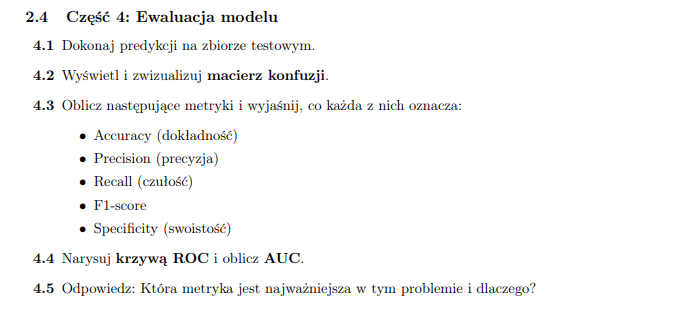